In [0]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.core.common import flatten


"""
In this notebook I try to generalize the seasonal effect removal.
I am creating my own dataset to try,which i use in my notebooks.
I cut the utility method part
"""

trends [0, 1, 2, 3, 4]
trends [0, 1, 2, 3, 4]
values [5, 10, 13, 15, 18, 28, 29, 30, 25, 20, 10, 4]
values [6, 11, 14, 16, 19, 29, 30, 31, 26, 21, 11, 5]
values [7, 12, 15, 17, 20, 30, 31, 32, 27, 22, 12, 6]
values [8, 13, 16, 18, 21, 31, 32, 33, 28, 23, 13, 7]
values [9, 14, 17, 19, 22, 32, 33, 34, 29, 24, 14, 8]


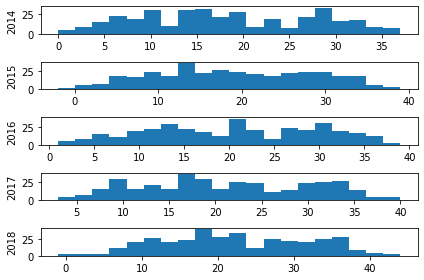

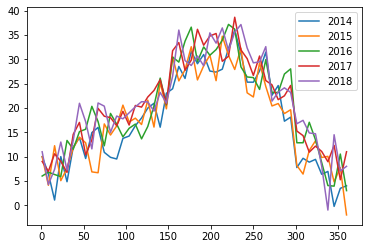

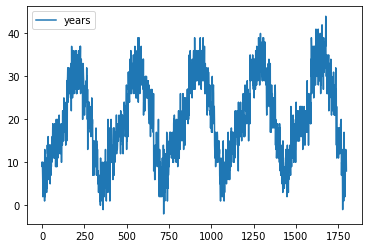

In [2]:
means= [5,10, 13,15,18, 28,29,30 ,25,20,10 , 4]
stds=[1,1,1,1,1]
trends = [k * 1 for k in range(len(stds))]
print("trends",trends)

years5 = gen_multi_dim_data(trends=trends, means= means,stds=stds,samples=30)

dff = convert_to_df(years5,["2014","2015","2016","2017","2018"])
df_to_hist(dff)
summarize_df_plots(dff)
df_flat = df_to_flat(dff,"years")
df_flat.plot()

In [0]:
def remove_seasonal_effect(values,period):
  diff = list()
  for i in range(period, len(values)):
    value = values[i] - values[i - period]
    diff.append(value)
  return diff


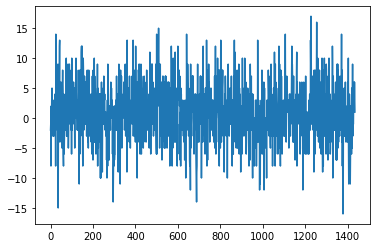

In [4]:
not_seasonal = remove_seasonal_effect(df_flat.values,365)
plt.plot(not_seasonal)
plt.show()

In [0]:
def polyfit_set(series,degree):
  X = [i%365 for i in range(0, len(series))]
  y = series.values
  coef = np.polyfit(X, y, degree)
  print('Coefficients: %s' % coef)
  # create curve
  curve = list()
  for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
      value += X[i]**(degree-d) * coef[d]
    curve.append(value)
  # plot curve over original data
  plt.plot(series.values)
  plt.plot(curve, color='red', linewidth=3)
  plt.show()

Coefficients: [-8.11612145e-04  2.93626846e-01  2.51825506e+00]


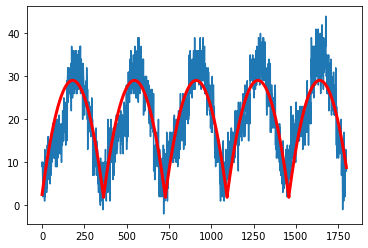

In [8]:
polyfit_set( df_flat["years"],2 )

Coefficients: [-1.79280012e-06  1.59370116e-04  1.53520294e-01  6.70851288e+00]


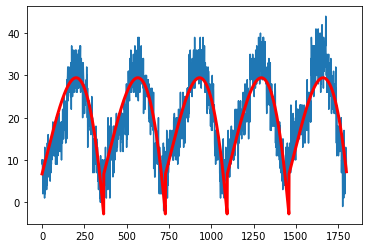

In [9]:
polyfit_set( df_flat["years"],3 )

Coefficients: [ 2.51368511e-08 -1.99947711e-05  4.39311312e-03 -1.86193052e-01
  1.27864910e+01]


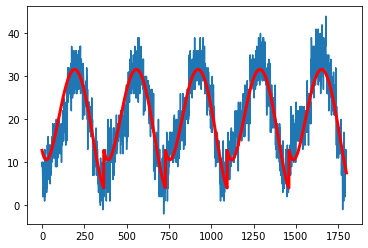

In [10]:
polyfit_set( df_flat["years"],4 )

Coefficients: [ 1.98061275e-10 -1.54479909e-07  3.78870252e-05 -3.46581083e-03
  2.18939912e-01  7.98044492e+00]


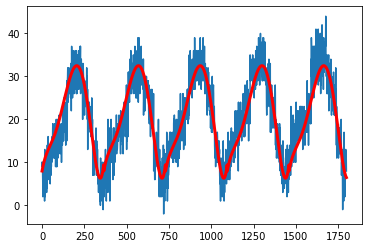

In [11]:
polyfit_set( df_flat["years"],5 )

In [0]:
from numpy import polyfit
def remove_seasonality(series,degree):
  X = [i%365 for i in range(0, len(series))]
  y = series.values
  coef = np.polyfit(X, y, degree)
  print('Coefficients: %s' % coef)
  # create curve
  curve = list()
  for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
      value += X[i]**(degree-d) * coef[d]
    curve.append(value)  
  values = series.values
  diff = list()
  for i in range(len(values)):
    value = values[i] - curve[i]
    diff.append(value)
  plt.plot(diff)
  plt.show()



Coefficients: [-8.11612145e-04  2.93626846e-01  2.51825506e+00]


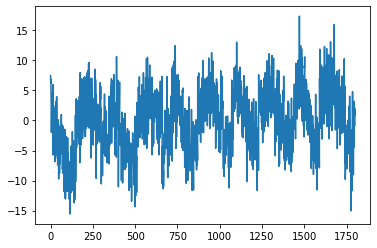

In [18]:
remove_seasonality(df_flat["years"],2)

Coefficients: [-1.79280012e-06  1.59370116e-04  1.53520294e-01  6.70851288e+00]


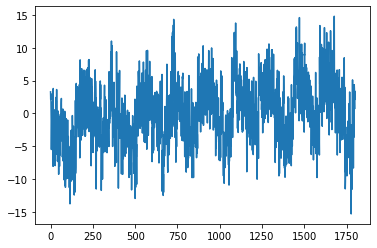

In [19]:
remove_seasonality(df_flat["years"],3)

Coefficients: [ 2.51368511e-08 -1.99947711e-05  4.39311312e-03 -1.86193052e-01
  1.27864910e+01]


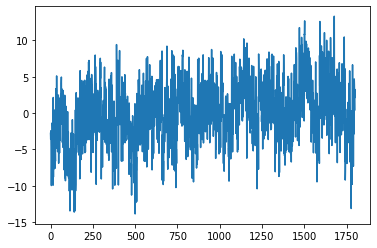

In [20]:
remove_seasonality(df_flat["years"],4)

Coefficients: [ 1.98061275e-10 -1.54479909e-07  3.78870252e-05 -3.46581083e-03
  2.18939912e-01  7.98044492e+00]


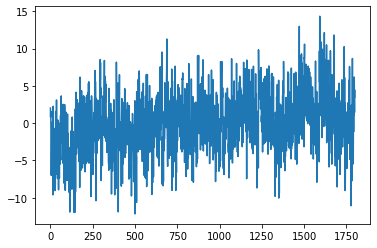

In [22]:
remove_seasonality(df_flat["years"],5)